In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [2]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

In [3]:
def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

In [4]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [5]:
def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [6]:

def initialize_parameters(n_x, n_h, n_y):
       
    np.random.seed(1)
    
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [7]:
parameters = initialize_parameters(3,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[0.]]


In [8]:

def initialize_parameters_deep(layer_dims):
       
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

In [9]:
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


In [10]:

def linear_forward(A, W, b):
    
    Z = np.dot(W,A) +b
    
    cache = (A, W, b)
    
    return Z, cache

In [11]:
# A, W, b = linear_forward_test_case()

linear_forward_test_case = lambda : (np.array([[1.62434536, -0.61175641],
                                                [-0.52817175, -1.07296862],
                                                [0.86540763, -2.3015387 ]]),
 np.array([[-1.07296862,  0.86540763, -2.3015387 ],
          [ 1.74481176, -0.7612069 ,  0.3190391 ]]), 
np.array([[0.]]))

A, W, b = linear_forward_test_case()

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[-4.19172461  5.02492059]
 [ 3.51232374 -0.9849295 ]]


In [12]:

def linear_activation_forward(A_prev, W, b, activation):
        
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
       
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
       
    
    cache = (linear_cache, activation_cache)

    return A, cache

In [13]:
linear_activation_forward_test_case = lambda : (np.array([[ 0.09762701,  0.43037873],
                                                        [ 0.20552675,  0.08976637],
                                                        [-0.1526904 ,  0.29178823]]),
    np.array([[ 0.61167629, -0.52817175, -1.07296862],
            [ 0.86540763, -2.3015387 ,  1.74481176]]),
    np.array([[0.]]))

A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.52871704 0.47570933]
 [0.34187345 0.66261464]]
With ReLU: A = [[0.11499471 0.        ]
 [0.         0.6749678 ]]


In [14]:

def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        
        A, cache = linear_activation_forward(A_prev, parameters["W"+ str(l)], parameters["b"+ str(l)], activation = "relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters["W"+ str(L)], parameters["b"+ str(L)], activation = "sigmoid")
    caches.append(cache)
    
           
    return AL, caches

In [15]:
L_model_forward_test_case_2hidden = lambda : (
    np.array([[1.62434536, -0.61175641],
              [-0.52817175, -1.07296862],
              [0.86540763, -2.3015387 ]]),
    {
        'W1': np.array([[ 0.01624345, -0.00611756, -0.00528172],
                        [ 0.01016998,  0.04105985, -0.01420664]]), 
        'b1': np.array([[0.], [0.]]), 
        'W2': np.array([[-0.00757545, -0.01250722]]), 
        'b2': np.array([[0.]])
    }
)
X, parameters = L_model_forward_test_case_2hidden()
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[0.49995257 0.49998337]]
Length of caches list = 2


In [16]:

def compute_cost(AL, Y):
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = -np.sum((np.multiply(Y,np.log(AL)) + np.multiply((1-Y),np.log(1-AL))))/m
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
   
    return cost

In [17]:
compute_cost_test_case = lambda : (np.array([[0.8, 0.9, 0.4]]), np.array([[1, 1, 0]]))

Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = inf


C:\Users\pande\AppData\Local\Temp\ipykernel_23144\2292183636.py:6: RuntimeWarning: divide by zero encountered in log
  cost = -np.sum((np.multiply(Y,np.log(AL)) + np.multiply((1-Y),np.log(1-AL))))/m


In [18]:

def linear_backward(dZ, cache):
    
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = np.dot(dZ,A_prev.T)/m
    db = np.sum(dZ, axis=1, keepdims=True)/m
    dA_prev = np.dot(W.T,dZ)
    
    
    return dA_prev, dW, db

In [19]:
# Set up some test inputs
linear_backward_test_case = lambda : (
    np.array([[1.62434536, -0.61175641],   # dZ shape (2,2)
              [-0.52817175, -1.07296862]]),
    (
        np.array([[ 0.61167629, -0.52817175],   # A_prev shape (2,2)
                  [ 0.86540763, -2.3015387 ]]),
        np.array([[ 0.5, -0.1],                 # W shape (2,2)
                  [ 0.3,  0.8]]),
        np.array([[0.], [0.]])                  # b shape (2,1)
    )
)
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[ 0.65372115 -0.62776879]
 [-0.58497194 -0.79719925]]
dW = [[0.658343   1.40685096]
 [0.12182079 1.00619747]]
db = [[ 0.50629448]
 [-0.80057018]]


In [20]:

def linear_activation_backward(dA, cache, activation):
    
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, cache[1])
        dA_prev, dW, db = linear_backward(dZ, cache[0])
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, cache[1])
        dA_prev, dW, db = linear_backward(dZ, cache[0])
    
    return dA_prev, dW, db

In [21]:
linear_activation_backward_test_case = lambda : (
    np.array([[1.62434536, -0.61175641],   # dA
              [-0.52817175, -1.07296862]]),
    (
        (   # linear_cache
            np.array([[ 0.61167629, -0.52817175],   # A_prev
                      [ 0.86540763, -2.3015387 ]]),
            np.array([[ -1.07296862, 0.86540763],   # W
                      [  1.74481176, -0.7612069 ]]),
            np.array([[0.], [0.]])                  # b
        ),
        np.array([[0.3190391, -0.24937038],          # activation_cache = Z
                  [0.21220659, -1.23005814]])
    )
)

dAL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[-0.65263153 -0.16608188]
 [ 0.44202598  0.01262783]]
dW = [[0.16085678 0.34460816]
 [0.0096598  0.15960434]]
db = [[ 0.1226699 ]
 [-0.15917806]]

relu:
dA_prev = [[-2.66443188  0.        ]
 [ 1.80776885  0.        ]]
dW = [[ 0.49678677  0.70286043]
 [-0.16153507 -0.22854193]]
db = [[ 0.81217268]
 [-0.26408588]]


In [22]:

def L_model_backward(AL, Y, caches):
    
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [23]:
def L_model_backward_test_case():
    np.random.seed(3)
    AL = np.random.randn(1, 4)  # 1 output unit, 4 examples
    Y = np.array([[1, 0, 1, 1]])  # Example true labels

    # Cache for layer 1 (linear -> ReLU)
    A_prev1 = np.random.randn(3, 4)  # 3 units in hidden layer, 4 examples
    W1 = np.random.randn(3, 2)       # Weights from input (2 features) to hidden (3 units)
    b1 = np.random.randn(3, 1)
    Z1 = np.random.randn(3, 4)
    linear_cache1 = (A_prev1, W1, b1)
    activation_cache1 = Z1
    cache1 = (linear_cache1, activation_cache1)

    # Cache for layer 2 (linear -> Sigmoid)
    A_prev2 = A_prev1                # Output from previous layer
    W2 = np.random.randn(1, 3)       # Weights from hidden (3 units) to output (1 unit)
    b2 = np.random.randn(1, 1)
    Z2 = np.random.randn(1, 4)
    linear_cache2 = (A_prev2, W2, b2)
    activation_cache2 = Z2
    cache2 = (linear_cache2, activation_cache2)

    caches = [cache1, cache2]

    return AL, Y, caches

In [24]:
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
# print(grads)
# def print_grads(grads):
#     L = len(grads) // 3 # number of layers in the neural network
#     for l in range(L):
#         print("dW" + str(l+1) + " = "+ str(grads["dW" + str(l + 1)]))
#         print("db" + str(l+1) + " = "+ str(grads["db" + str(l + 1)]))
#         print("dA" + str(l+1) + " = "+ str(grads["dA" + str(l + 1)]))


def print_grads(grads):
    # Extract layer numbers from gradient keys
    layer_numbers = set()
    for key in grads.keys():
        if key.startswith('dW') or key.startswith('db') or key.startswith('dA'):
            try:
                layer_num = int(key[2:])  # Extract number after 'dW', 'db', or 'dA'
                layer_numbers.add(layer_num)
            except:
                continue
    
    # Sort layer numbers
    layer_numbers = sorted(layer_numbers)
    
    # Print gradients for each layer
    for l in layer_numbers:
        if f"dW{l}" in grads:
            print(f"dW{l} = {grads[f'dW{l}']}")
        if f"db{l}" in grads:
            print(f"db{l} = {grads[f'db{l}']}")
        if f"dA{l}" in grads:
            print(f"dA{l} = {grads[f'dA{l}']}")
        
print_grads(grads)

dA0 = [[ 0.          0.7146888  -1.45019292  0.        ]
 [ 0.          0.14866238  1.62542082  0.        ]]
dW1 = [[ 0.03903602  0.05251084 -0.18811341]
 [-0.01231628  0.42724447  0.18803967]
 [ 0.          0.          0.        ]]
db1 = [[-0.11003532]
 [-0.24826239]
 [ 0.        ]]
dA1 = [[ 0.12913162 -0.44014127  1.34474919 -0.12582543]
 [-0.14175655  0.48317296 -1.47622251  0.13812712]
 [ 0.01663708 -0.05670698  0.17325496 -0.01621111]]
dW2 = [[-0.02147491  0.40867788  0.12707748]]
db2 = [[-0.22168561]]


In [25]:

def update_parameters(parameters, grads, learning_rate):
       
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] =  parameters["W" + str(l+1)] -(learning_rate* grads["dW"+ str(l+1)])
        parameters["b" + str(l+1)] =  parameters["b" + str(l+1)] -(learning_rate* grads["db"+ str(l+1)])
    return parameters

In [26]:
def update_parameters_test_case():
    parameters = {
        'W1': np.array([[ 0.01624345, -0.00611756, -0.00528172],
                        [ 0.01016998,  0.04105985, -0.01420664]]), 
        'b1': np.array([[0.], [0.]]), 
        'W2': np.array([[-0.00757545, -0.01250722]]), 
        'b2': np.array([[0.]])
    }
    
    grads = {
        'dW1': np.array([[ 0.00018733, -0.00019033, -0.00020411],
                         [-0.00010471,  0.00010267,  0.00011046]]),
        'db1': np.array([[-0.00068527], [ 0.00030314]]),
        'dW2': np.array([[-0.00093748, -0.00022857]]),
        'db2': np.array([[-0.0008815 ]])
    }
    
    return parameters, grads
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[ 0.01622472 -0.00609853 -0.00526131]
 [ 0.01018045  0.04104958 -0.01421769]]
b1 = [[ 6.8527e-05]
 [-3.0314e-05]]
W2 = [[-0.0074817  -0.01248436]]
b2 = [[8.815e-05]]


In [27]:
train_dataset = h5py.File('./train_catvnoncat.h5', "r")
train_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('./test_catvnoncat.h5', "r")
test_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

train_y = train_y_orig.reshape((1, train_y_orig.shape[0]))
test_y = test_y_orig.reshape((1, test_y_orig.shape[0]))
    


y = 0. It's a non-cat picture.


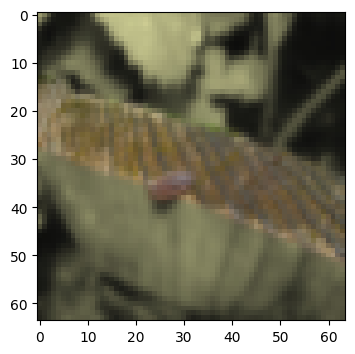

In [28]:
# Example of a picture
index = 12
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [29]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [30]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [31]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [32]:

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, activation="relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation="sigmoid")
        
        # Compute cost
        cost = compute_cost(A2,Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation="sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation="relu")
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6930497356599891
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912677
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605748
Cost after iteration 500: 0.515830477276473
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.43391631512257495
Cost after iteration 800: 0.400797753620389
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366412
Cost after iteration 1100: 0.30527536361962637
Cost after iteration 1200: 0.27491377282130164
Cost after iteration 1300: 0.2468176821061484
Cost after iteration 1400: 0.19850735037466116
Cost after iteration 1500: 0.17448318112556638
Cost after iteration 1600: 0.17080762978096886
Cost after iteration 1700: 0.11306524562164715
Cost after iteration 1800: 0.09629426845937152
Cost after iteration 1900: 0.08342617959726863
Cost after iteration 2000: 0.07439078704319078
Cost after iteration 2100: 0.066307481

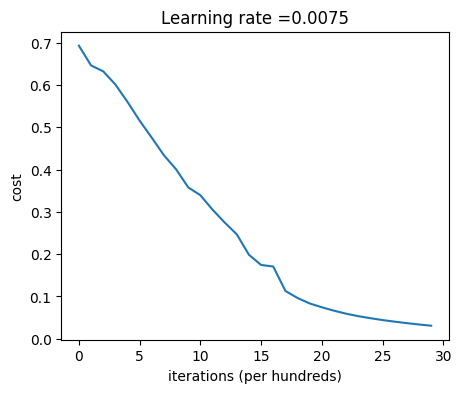

In [33]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 3000, print_cost=True)
# parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [34]:
def predict(X, y, parameters):
        
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

def print_mislabeled_images(classes, X, y, p):
   
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))


In [35]:
predictions_train = predict(train_x, train_y, parameters)
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.9999999999999998
Accuracy: 0.72


In [36]:
### CONSTANTS ###
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [37]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    
    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL,Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [38]:
parameters = L_layer_model(train_x, train_y, layers_dims, print_cost = True)

Cost after iteration 0: 0.693148
Cost after iteration 100: 0.678011
Cost after iteration 200: 0.667600
Cost after iteration 300: 0.660422
Cost after iteration 400: 0.655458
Cost after iteration 500: 0.652013
Cost after iteration 600: 0.649616
Cost after iteration 700: 0.647942
Cost after iteration 800: 0.646770
Cost after iteration 900: 0.645947
Cost after iteration 1000: 0.645368
Cost after iteration 1100: 0.644961
Cost after iteration 1200: 0.644673


KeyboardInterrupt: 

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.678007
Cost after iteration 200: 0.667594
Cost after iteration 300: 0.660415
Cost after iteration 400: 0.655452
Cost after iteration 500: 0.652008
Cost after iteration 600: 0.649611
Cost after iteration 700: 0.647938
Cost after iteration 800: 0.646766
Cost after iteration 900: 0.645944
Cost after iteration 1000: 0.645366
Cost after iteration 1100: 0.644959
Cost after iteration 1200: 0.644671
Cost after iteration 1300: 0.644468
Cost after iteration 1400: 0.644325
Cost after iteration 1500: 0.644223
Cost after iteration 1600: 0.644151
Cost after iteration 1700: 0.644099
Cost after iteration 1800: 0.644063
Cost after iteration 1900: 0.644037
Cost after iteration 2000: 0.644019
Cost after iteration 2100: 0.644006
Cost after iteration 2200: 0.643997
Cost after iteration 2300: 0.643990
Cost after iteration 2400: 0.643985
Cost after iteration 2500: 0.643982
Cost after iteration 2600: 0.643980
Cost after iteration 2700: 0.643978
Cost

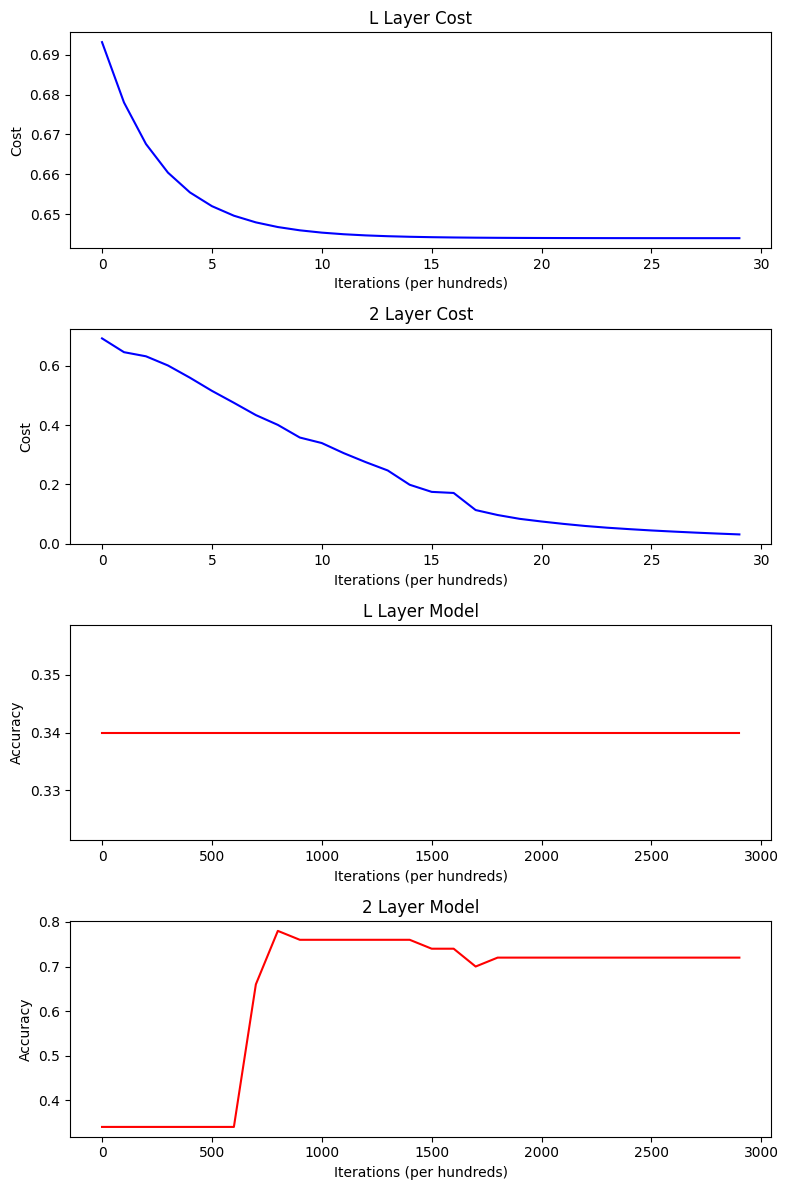

In [46]:


accuracies_L_Layer=[]
accuracies_2_Layer=[]
iters_L_Layer=[]
iters_2_Layer=[]

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, activation="relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation="sigmoid")
        
        # Compute cost
        cost = compute_cost(A2,Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation="sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation="relu")
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            iters_2_Layer.append(i)
            accuracies_2_Layer.append(predict(test_x, test_y, parameters))
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    # plt.plot(np.squeeze(costs))
    # plt.ylabel('cost')
    # plt.xlabel('iterations (per hundreds)')
    # plt.title("Learning rate =" + str(learning_rate))
    # plt.show()
    
    return costs

def predict(X, y, parameters):
        
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    # print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return np.sum((p == y)/m)


def solve(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    
    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL,Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            iters_L_Layer.append(i)
            accuracies_L_Layer.append(predict(test_x, test_y, parameters))
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
    return costs


n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = [12288, 512, 20, 7, 5, 1] 

costs_L_Layer=solve(train_x, train_y, layers_dims, print_cost = True)
costs_2_Layer=two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), print_cost=True)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 12))

ax1.plot(np.squeeze(costs_L_Layer), 'b-')
ax1.set_ylabel("Cost")
ax1.set_xlabel("Iterations (per hundreds)")
ax1.set_title("L Layer Cost")

ax2.plot(np.squeeze(costs_2_Layer), 'b-')
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iterations (per hundreds)")
ax2.set_title("2 Layer Cost")

ax3.plot(iters_L_Layer, accuracies_L_Layer, 'r-')
ax3.set_ylabel("Accuracy")
ax3.set_xlabel("Iterations (per hundreds)")
ax3.set_title("L Layer Model")

ax4.plot(iters_2_Layer, accuracies_2_Layer, 'r-')
ax4.set_ylabel("Accuracy")
ax4.set_xlabel("Iterations (per hundreds)")
ax4.set_title("2 Layer Model")

plt.tight_layout()
plt.show()

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.678006
Cost after iteration 200: 0.667593
Cost after iteration 300: 0.660415
Cost after iteration 400: 0.655451
Cost after iteration 500: 0.652007
Cost after iteration 600: 0.649611
Cost after iteration 700: 0.647937
Cost after iteration 800: 0.646766
Cost after iteration 900: 0.645944
Cost after iteration 1000: 0.645366
Cost after iteration 1100: 0.644959
Cost after iteration 1200: 0.644671
Cost after iteration 1300: 0.644468
Cost after iteration 1400: 0.644324
Cost after iteration 1500: 0.644223
Cost after iteration 1600: 0.644151
Cost after iteration 1700: 0.644099
Cost after iteration 1800: 0.644063
Cost after iteration 1900: 0.644037
Cost after iteration 2000: 0.644019
Cost after iteration 2100: 0.644006
Cost after iteration 2200: 0.643997
Cost after iteration 2300: 0.643990
Cost after iteration 2400: 0.643985
Cost after iteration 2500: 0.643982
Cost after iteration 2600: 0.643980
Cost after iteration 2700: 0.643978
Cost

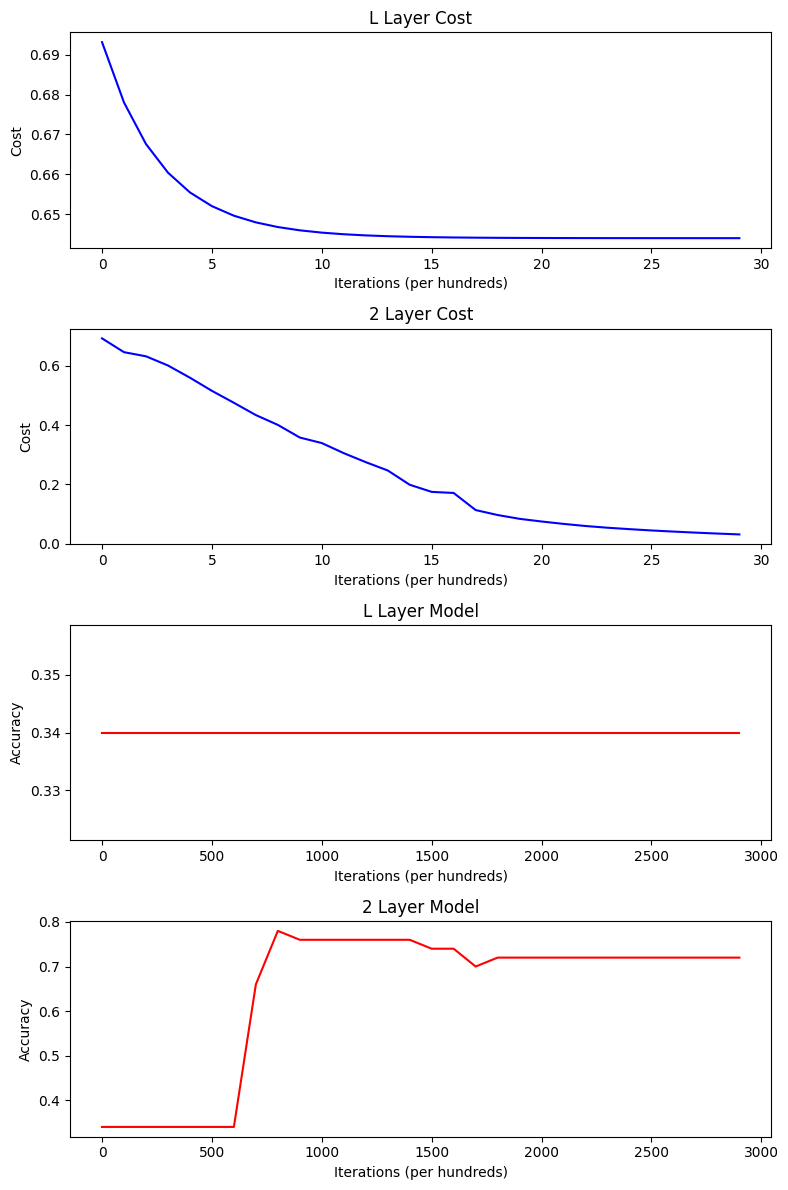

In [47]:


accuracies_L_Layer=[]
accuracies_2_Layer=[]
iters_L_Layer=[]
iters_2_Layer=[]

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, activation="relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation="sigmoid")
        
        # Compute cost
        cost = compute_cost(A2,Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation="sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation="relu")
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            iters_2_Layer.append(i)
            accuracies_2_Layer.append(predict(test_x, test_y, parameters))
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    # plt.plot(np.squeeze(costs))
    # plt.ylabel('cost')
    # plt.xlabel('iterations (per hundreds)')
    # plt.title("Learning rate =" + str(learning_rate))
    # plt.show()
    
    return costs

def predict(X, y, parameters):
        
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    # print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return np.sum((p == y)/m)


def solve(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    
    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL,Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            iters_L_Layer.append(i)
            accuracies_L_Layer.append(predict(test_x, test_y, parameters))
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
    return costs


layers_dims = [12288, 500, 250, 20, 7, 5, 1] 
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1

costs_L_Layer=solve(train_x, train_y, layers_dims, print_cost = True)
costs_2_Layer=two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), print_cost=True)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 12))

ax1.plot(np.squeeze(costs_L_Layer), 'b-')
ax1.set_ylabel("Cost")
ax1.set_xlabel("Iterations (per hundreds)")
ax1.set_title("L Layer Cost")

ax2.plot(np.squeeze(costs_2_Layer), 'b-')
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iterations (per hundreds)")
ax2.set_title("2 Layer Cost")

ax3.plot(iters_L_Layer, accuracies_L_Layer, 'r-')
ax3.set_ylabel("Accuracy")
ax3.set_xlabel("Iterations (per hundreds)")
ax3.set_title("L Layer Model")

ax4.plot(iters_2_Layer, accuracies_2_Layer, 'r-')
ax4.set_ylabel("Accuracy")
ax4.set_xlabel("Iterations (per hundreds)")
ax4.set_title("2 Layer Model")

plt.tight_layout()
plt.show()